In [9]:
import matplotlib.pyplot as plt

In [1]:
from jqdatasdk import *
auth('15201358389','358389') 

/home/zhuf/.pyenv/versions/data_sci_env_py3.6.10/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/zhuf/.pyenv/versions/data_sci_env_py3.6.10/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [187]:
get_query_count()

{'total': 10000000, 'spare': 8996581}

In [26]:
from jqdatasdk import finance

In [27]:
q = query(finance.FUND_MAIN_INFO).filter(finance.FUND_MAIN_INFO.main_code=='004666')
df = finance.run_query(q)
print(df)

     id main_code        name     advisor       trustee  operate_mode_id  \
0  2908    004666  长城久嘉创新成长混合  长城基金管理有限公司  中国农业银行股份有限公司           401001   

  operate_mode  underlying_asset_type_id underlying_asset_type  start_date  \
0        开放式基金                    402004                   混合型  2017-07-05   

  end_date  
0     None  


In [16]:
q=query(finance.FUND_NET_VALUE).filter(finance.FUND_NET_VALUE.code=="004666").order_by(finance.FUND_NET_VALUE.day.desc())
df=finance.run_query(q)
print(df)

           id    code         day  net_value  sum_value  factor  acc_factor  \
0    22516749  004666  2020-04-30     1.2549     1.2549     1.0     0.96769   
1    22507797  004666  2020-04-29     1.1739     1.1739     1.0     0.96769   
2    22498110  004666  2020-04-28     1.1808     1.1808     1.0     0.96769   
3    22491447  004666  2020-04-27     1.1341     1.1341     1.0     0.96769   
4    22476833  004666  2020-04-24     1.1423     1.1423     1.0     0.96769   
..        ...     ...         ...        ...        ...     ...         ...   
688   2607661  004666  2017-07-11     0.9854     0.9854     1.0     1.00000   
689   2607660  004666  2017-07-10     0.9882     0.9882     1.0     1.00000   
690   2607659  004666  2017-07-07     1.0014     1.0014     1.0     1.00000   
691   2607658  004666  2017-07-06     1.0062     1.0062     1.0     1.00000   
692   2607657  004666  2017-07-05     1.0008     1.0008     1.0     1.00000   

     refactor_net_value  
0              1.214354  

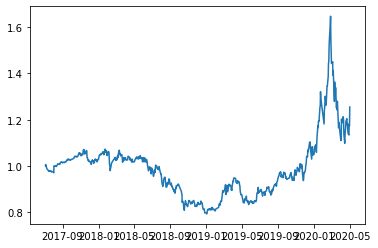

In [10]:
plt.plot(df['day'], df['net_value'])

In [11]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show

In [12]:
output_notebook()

Loading BokehJS ...

In [14]:
p = figure(width=1000, height=500, x_axis_type="datetime")
p.line(df['day'], df['net_value'])
show(p)

In [33]:
q = query(finance.FUND_NET_VALUE).filter(finance.FUND_NET_VALUE.code=="519674").order_by(finance.FUND_NET_VALUE.day.desc())
df_all = finance.run_query(q)

In [35]:
df = df_all.loc[:365]
p = figure(width=1000, height=500, x_axis_type="datetime")
#p.circle(df['day'], df['net_value'])
p.line(df['day'], df['net_value'])
show(p)

In [149]:
from sqlalchemy import extract

funds = {}
for year in range(2001,2021):
    funds[year] = finance.run_query(query(finance.FUND_MAIN_INFO).filter(finance.FUND_MAIN_INFO.end_date==None,finance.FUND_MAIN_INFO.operate_mode!='封闭式基金',extract('year', finance.FUND_MAIN_INFO.start_date) == year))

In [186]:
sum = 0
records = 0
for year in range(2001,2021):
    sum += len(funds[year])
    print(year, ': ', len(funds[year]))
    records += (2020- year +1)*250*len(funds[year])
print('sum: ' , sum)
print('records：', records)

2001 :  3
2002 :  14
2003 :  39
2004 :  49
2005 :  62
2006 :  96
2007 :  63
2008 :  110
2009 :  144
2010 :  156
2011 :  230
2012 :  312
2013 :  411
2014 :  450
2015 :  974
2016 :  1351
2017 :  1146
2018 :  1215
2019 :  1583
2020 :  576
sum:  8984
records： 11541250


In [155]:
df_list = [funds[i] for i in funds]

In [157]:
import pandas as pd
funds_info = pd.concat(df_list)

In [158]:
funds_info

,id,main_code,name,advisor,trustee,operate_mode_id,operate_mode,underlying_asset_type_id,underlying_asset_type,start_date,end_date
0,1,000001,华夏成长,华夏基金管理有限公司,中国建设银行股份有限公司,401001,开放式基金,402004,混合型,2001-12-18,None
1,3347,040001,华安创新,华安基金管理有限公司,交通银行股份有限公司,401001,开放式基金,402004,混合型,2001-09-21,None
2,3916,202001,南方稳健,南方基金管理股份有限公司,中国工商银行股份有限公司,401001,开放式基金,402004,混合型,2001-09-28,None
0,604,001001,华夏债券,华夏基金管理有限公司,交通银行股份有限公司,401001,开放式基金,402003,债券型,2002-10-23,None
1,1162,206001,鹏华弘泰混合,鹏华基金管理有限公司,中国工商银行股份有限公司,401001,开放式基金,402004,混合型,2002-05-24,None
...,...,...,...,...,...,...,...,...,...,...,...
571,15838,008483,广发央企80债券指数C,广发基金管理有限公司,交通银行股份有限公司,401001,开放式基金,402003,债券型,2020-04-29,None
572,15860,009404,平安惠享纯债C,平安基金管理有限公司,平安银行股份有限公司,401001,开放式基金,402003,债券型,2020-04-23,None
573,15865,007865,东方红货币D,上海东方证券资产管理有限公司,中国工商银行股份有限公司,401001,开放式基金,402002,货币型,2020-04-27,None
574,15956,009208,建信沪深300指数增强C,建信基金管理有限责任公司,招商银行股份有限公司,401001,开放式基金,402001,股票型,2020-05-07,None


In [169]:
funds_values_history = {}

for code in funds_info['main_code']:
    q=query(finance.FUND_NET_VALUE).filter(finance.FUND_NET_VALUE.code==code).order_by(finance.FUND_NET_VALUE.day.desc())
    funds_values_history[code] = finance.run_query(q)

Exception: 您的查询条数超过了当日最大查询限制：100万条；系统已为您自动提升到1000万条/天，体验期15天，再次登录即可生效。如需更多调用额度请联系JQData管理员，微信号：JQData02

In [171]:
len(funds_values_history)

244

In [173]:
funds_info['main_code'].iat[243]

'519995'

In [178]:
finished = [code for code in funds_values_history]

In [176]:
funds_info['main_code'].iat[243]

'519995'

In [180]:
funds_info['main_code'].iloc[243:]

76     519995
77     530003
78     540001
79     540002
80     550001
        ...  
571    008483
572    009404
573    007865
574    009208
575    009322
Name: main_code, Length: 8741, dtype: object

In [181]:
funds_values_history['519995']

,id,code,day,net_value,sum_value,factor,acc_factor,refactor_net_value
0,22525881,519995,2020-04-30,0.6149,3.0570,1.0,5.944494,3.655269
1,22515499,519995,2020-04-29,0.6104,3.0461,1.0,5.944494,3.628519
2,22499845,519995,2020-04-28,0.6122,3.0505,1.0,5.944494,3.639219
3,22496083,519995,2020-04-27,0.6065,3.0367,1.0,5.944494,3.605336
4,22485303,519995,2020-04-24,0.6020,3.0258,1.0,5.944494,3.578585
...,...,...,...,...,...,...,...,...
3414,2372029,519995,2006-05-17,0.9833,0.9833,1.0,1.000000,0.983300
3415,2372028,519995,2006-05-16,0.9876,0.9876,1.0,1.000000,0.987600
3416,2372027,519995,2006-05-15,1.0036,1.0036,1.0,1.000000,1.003600
3417,2372026,519995,2006-05-12,1.0000,1.0000,1.0,1.000000,1.000000


In [183]:
funds_info[funds_info['main_code'] =='519995']

,id,main_code,name,advisor,trustee,operate_mode_id,operate_mode,underlying_asset_type_id,underlying_asset_type,start_date,end_date
76,4687,519995,长信金利趋势混合,长信基金管理有限责任公司,上海浦东发展银行股份有限公司,401001,开放式基金,402004,混合型,2006-04-30,None


In [184]:
q=query(finance.FUND_NET_VALUE).filter(finance.FUND_NET_VALUE.code=='519995').order_by(finance.FUND_NET_VALUE.day.desc())
print(finance.run_query(q))

            id    code         day  net_value  sum_value  factor  acc_factor  \
0     22525881  519995  2020-04-30     0.6149     3.0570     1.0    5.944494   
1     22515499  519995  2020-04-29     0.6104     3.0461     1.0    5.944494   
2     22499845  519995  2020-04-28     0.6122     3.0505     1.0    5.944494   
3     22496083  519995  2020-04-27     0.6065     3.0367     1.0    5.944494   
4     22485303  519995  2020-04-24     0.6020     3.0258     1.0    5.944494   
...        ...     ...         ...        ...        ...     ...         ...   
3414   2372029  519995  2006-05-17     0.9833     0.9833     1.0    1.000000   
3415   2372028  519995  2006-05-16     0.9876     0.9876     1.0    1.000000   
3416   2372027  519995  2006-05-15     1.0036     1.0036     1.0    1.000000   
3417   2372026  519995  2006-05-12     1.0000     1.0000     1.0    1.000000   
3418   5119121  519995  2006-04-30     1.0000     1.0000     1.0    1.000000   

      refactor_net_value  
0           

In [188]:
for code in funds_info['main_code'].iloc[244:]:
    q=query(finance.FUND_NET_VALUE).filter(finance.FUND_NET_VALUE.code==code).order_by(finance.FUND_NET_VALUE.day.desc())
    funds_values_history[code] = finance.run_query(q)

In [190]:
len(funds_values_history)

8984

In [191]:
len(funds_info)

8984

In [194]:
df1 = funds_values_history['270042'].loc[:80]
df2 = funds_values_history['050025'].loc[:80]
p = figure(width=1000, height=500, x_axis_type="datetime")
#p.circle(df['day'], df['net_value'])
p.line(df1['day'], df1['net_value'], color='red')
p.line(df2['day'], df2['net_value'])
show(p)

In [195]:
import sys
sys.getsizeof(funds_values_history)

295008

In [196]:
295008/1024

288.09375

In [198]:
!ls

fund.ipynb  Quant.ipynb  Untitled.ipynb


In [200]:
funds_info.to_pickle('funds_info.gzip')

In [204]:
for code, fund in funds_values_history.items():
    fund.to_pickle('funds_value/' + code + '.gzip')

In [205]:
!ll

/bin/sh: 1: ll: not found


In [206]:
!ls

fund.ipynb  funds_info.gzip  funds_value  Quant.ipynb  Untitled.ipynb


In [207]:
!ll

/bin/sh: 1: ll: not found


In [208]:
!ls -h

fund.ipynb  funds_info.gzip  funds_value  Quant.ipynb  Untitled.ipynb


In [209]:
!ls -hl

total 3.1M
-rw-rw-r-- 1 zhuf zhuf 137K May  2 08:06 fund.ipynb
-rw-rw-r-- 1 zhuf zhuf 1.6M May  2 07:55 funds_info.gzip
drwxrwxr-x 3 zhuf zhuf 260K May  2 08:05 funds_value
-rw-rw-r-- 1 zhuf zhuf 1.1M May  2 08:00 Quant.ipynb
-rw-rw-r-- 1 zhuf zhuf  26K Apr 22 08:22 Untitled.ipynb


In [211]:
df = funds_values_history['004666']

In [220]:
compare = df.net_value[1:] #+ df.net_value.iloc[-1]

In [238]:
compare = pd.concat([df.net_value.iloc[1:], pd.Series(df.net_value.iloc[-1])])
c = compare.to_numpy()

In [239]:
d = df.net_value.to_numpy()

In [247]:
change_pct = pd.Series((d-c)/c*100, name='change_pct')

In [251]:
df_new = pd.concat([df, change_pct],axis=1)

In [304]:
cal = df_new[:22].change_pct

In [305]:
cal = cal.iloc[::-1]

In [265]:
t = pd.Series(range(1,7))
t

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [266]:
t.cumprod()

0      1
1      2
2      6
3     24
4    120
5    720
dtype: int64

In [271]:
import numpy as  np
n = np.arange(1,7)
n

array([1, 2, 3, 4, 5, 6])

In [272]:
n.cumsum()

array([ 1,  3,  6, 10, 15, 21])

In [273]:
n.cumprod()

array([  1,   2,   6,  24, 120, 720])

In [281]:
def trend(x):
    x[0] = 0
    total =1
    for i in x:
        total = total*(1+i/100)
    return total

In [306]:
cal

21   -0.919561
20    1.135340
19    7.127584
18   -1.338989
17    2.216977
16    0.008247
15   -1.360600
14   -4.999164
13   -3.379092
12    3.615665
11    1.450294
10    0.961705
9     2.411396
8     0.930116
7    -2.183479
6     0.594127
5    -1.611542
4    -2.040991
3    -0.717850
2     4.117803
1    -0.584350
0     6.900077
Name: change_pct, dtype: float64

In [307]:
new_cal = (1+cal/100)
new_cal

21    0.990804
20    1.011353
19    1.071276
18    0.986610
17    1.022170
16    1.000082
15    0.986394
14    0.950008
13    0.966209
12    1.036157
11    1.014503
10    1.009617
9     1.024114
8     1.009301
7     0.978165
6     1.005941
5     0.983885
4     0.979590
3     0.992822
2     1.041178
1     0.994157
0     1.069001
Name: change_pct, dtype: float64

In [308]:
new_cal.iloc[0] = 1

In [310]:
trend = new_cal.cumprod()

In [313]:
trend= (trend-1)*100

In [316]:
trend.index = range(22)

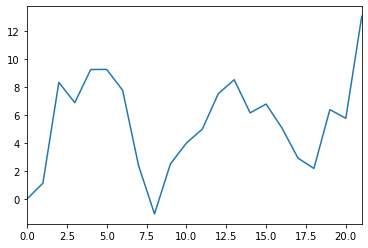

In [318]:
trend.plot()

## 计算每日涨跌幅

In [319]:
def change_cal(code):
    df = funds_values_history[code]
    compare = pd.concat([df.net_value.iloc[1:], pd.Series(df.net_value.iloc[-1])])
    c = compare.to_numpy()
    d = df.net_value.to_numpy()
    change_pct = pd.Series((d-c)/c*100, name='change_pct')
    df_new = pd.concat([df, change_pct],axis=1)
    return df_new

## 计算任意时间段内的收益

In [320]:
def earning(df,n, start= None , end=None):
    # df = funds_values_history[code]
    cal = df[:n].change_pct.iloc[::-1]
    new_cal = (1+cal/100)
    new_cal.iloc[0] = 1
    trend = new_cal.cumprod()
    trend= (trend-1)*100
    trend.index = range(n)
    return earning_trend